# Lineaire regressie

Deze methode kun je gebruiken om relaties te vinden tussen 2 verschillende variabelen.
Over het algemeen kun je er een trend mee zien, niet perse een correlatie tussen 2 variabelen.


In [117]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

diabetes = datasets.load_diabetes()

De sklearn.datasets bevat een paar interresante datasets.
voor deze opdracht gebruik ik de diabetes dataset.

In [118]:
diabetesX = diabetes.data[:, np.newaxis, 2]

diabetesXtrain = diabetesX[:-20]
diabetesXtest = diabetesX[-20:]

diabetesytrain = diabetes.target[:-20]
diabetesytest = diabetes.target[-20:]

ik split de data op en creeër een training set en een test set.
hiermee wil ik de model trainen.

In [119]:
regr = linear_model.LinearRegression()
regr.fit(diabetesXtrain, diabetesytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

ik train de model met de datasets die ik gecreeërd heb.

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


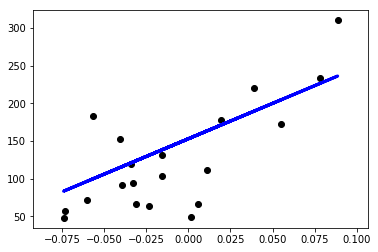

In [120]:
diabetesypred = regr.predict(diabetesXtest)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetesytest, diabetesypred))
print('Variance score: %.2f' % r2_score(diabetesytest, diabetesypred))

# Plot outputs
plt.scatter(diabetesXtest, diabetesytest,  color='black')
plt.plot(diabetesXtest, diabetesypred, color='blue', linewidth=3)

plt.show()

Hier zie je de resultaat van de lineaire regressie.

---------------------------------------------------------------------------------------------------------------------------

# Decision trees
decision trees is een methode voor de classificatie en in kleinere mate regressie.
Deze methode genereert resultaten gebaseerd op voorgaande data. (een soort van voorspellen/geïnformeerd gokken)

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()


voor deze methode gebruik ik de iris dataset.

In [122]:

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    #plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

Hier train ik de tree.

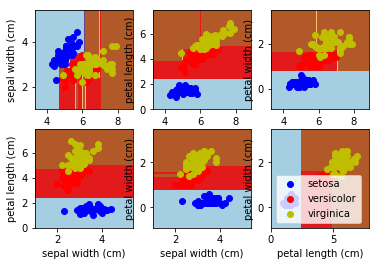

In [123]:

plt.legend()
plt.show()

er is nog een andere manier om het te visualiseren, hiervoor gebruik ik de graphviz package.

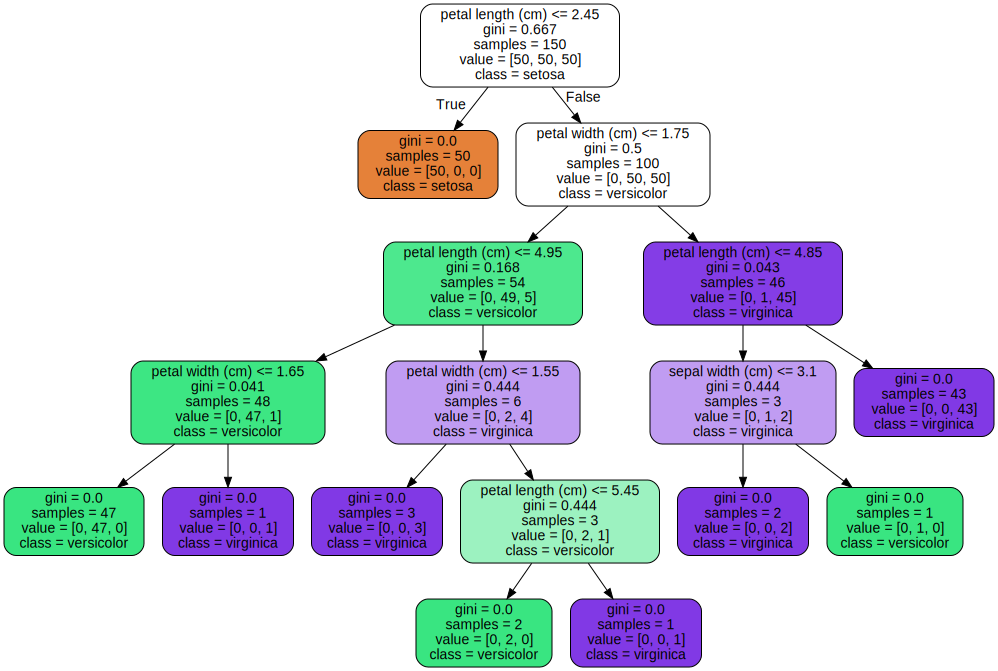

In [124]:
from sklearn.datasets import load_iris
import graphviz 
from sklearn import tree
iris = load_iris()
classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(iris.data, iris.target)

data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True) 
graph = graphviz.Source(data) 
graph

hier zie je de decision tree visueel uitgewerkt.

----------------------------------------------------------------------------------------------------------------------------

# K-means
De k-means functie probeert datapunten van een dataset samen te voegen die in een bepaalde marge "vergelijkbaar" zijn.

In [125]:
import random

def generatedataset():
    data = []
    for x in range(1200):
        random.seed(random.randint(0, 9999))
        for y in range(2):
            zero = random.randint(0, 30)
            one = random.randint(0, 20)
            if random.randint(0,5) is 0:
                zero = zero * (random.uniform(1.0, 1.5))
                one = one * ( random.uniform(1.0, 1.2))
            data.append([zero,one])
    return data

data = generatedataset()


met deze datagenerator probeer ik een redelijk niet homogene distributie te krijgen.
met wat extra randomization in de waardes kan ik volgens mij een redelijk overtuigende dataset genereren.

In [126]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets


X = np.array(data)

kmeans = KMeans(n_clusters=10, random_state=0).fit(X)
h = .02 

de kmeans heb ik 10 clusters gegeven, daarmee hoop ik een redelijke visuele representatie van de clustering te geven.

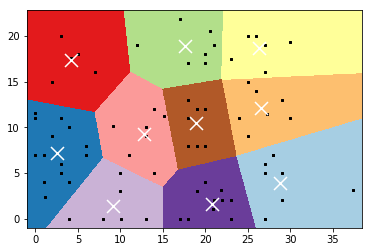

In [127]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plot
plot.figure(1)
plot.clf()
plot.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower')

plot.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

centroids = kmeans.cluster_centers_
plot.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plot.xlim(x_min, x_max)
plot.ylim(y_min, y_max)
plot.show()

hier zie je de kmeans plot